# Chapter 7 Ensemble Learning and Random Forests


In [107]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

## Voting Classifiers


In [37]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(
    1, 10001).reshape(-1, 1)


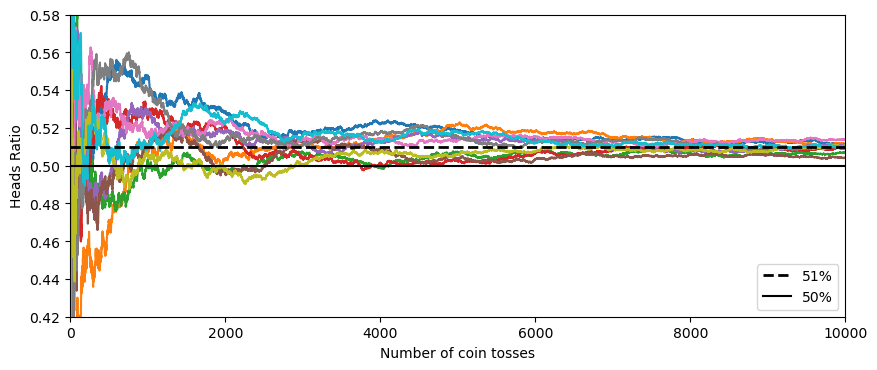

In [38]:
_, ax = plt.subplots(figsize=(10, 4), dpi=100)

ax.plot(cumulative_heads_ratio)
ax.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
ax.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
ax.set(xlabel="Number of coin tosses",
       ylabel="Heads Ratio",
       xlim=[0, 10000],
       ylim=[0.42, 0.58])
ax.legend(loc="lower right")

plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [40]:
X, y = make_moons(n_samples=500,noise=0.3)
print(tree_clf.__class__.__name__,
      f"accuracy score:{accuracy_score(y_test,y_pred_tree)}")


In [41]:
print(bag_clf.__class__.__name__,
      f"accuracy_score:{accuracy_score(y_test,y_pred)}")
rnd_clf = RandomForestClassifier()  # defalult n_estimators=100
svm_clf = SVC(gamma='scale')

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', log_clf),
                                          ('svc', svm_clf)],
                              voting='hard') 


In [42]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', LogisticRegression()), ('svc', SVC())])

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [44]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
np.sum(y_pred == y_pred_rf), len(y_pred)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))

LogisticRegression 0.816
RandomForestClassifier 0.856
SVC 0.88
VotingClassifier 0.816


### Soft voting

VotingClassifier : `voting = 'soft'`


In [45]:
_, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, constrained_layout=True)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
plot_decision_boundary(tree_clf, X, y, ax=axes[0])

plot_decision_boundary(bag_clf, X, y, ax=axes[1])
                                          ('svc', svm_clf)],
                              voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [46]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16)
rnd_clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.816
RandomForestClassifier 0.856
SVC 0.88
VotingClassifier 0.872


## Bagging Ensembles


In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
                            bootstrap=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt',
                                                        max_leaf_nodes=16),
                  n_estimators=500)

In [49]:
y_pred = bag_clf.predict(X_test)

In [50]:
print(bag_clf.__class__.__name__,f"accuracy_score:{accuracy_score(y_test,y_pred)}")


BaggingClassifier accuracy_score:0.872


In [51]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred_tree = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, f"accuracy score:{accuracy_score(y_test,y_pred_tree)}")

DecisionTreeClassifier accuracy score:0.824


### Decision boundary of a single Decision Tree and the deci‐sion boundary of a bagging ensemble of 500 trees compare


In [53]:
from matplotlib.colors import ListedColormap

In [63]:
def make_mesh(lims, h):
    x = np.linspace(lims[0], lims[1], h)
    y = np.linspace(lims[2], lims[3], h)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

decision boudary plot function


In [68]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            bootstrap=True,
                            oob_score=True)
bag_clf.fit(X_train, y_train)
    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    ax.contourf(x1,x2,y_pred, alpha=0.3,cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        ax.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    ax.plot(X[:,0][y == 0], X[:,1][y ==0],"yo",alpha=0.2)
    ax.plot(X[:,0][y == 1],X[:,1][y == 1],"bs", alpha=0.2)
    ax.set(xlabel="$x_1$",ylabel="$x_2$")

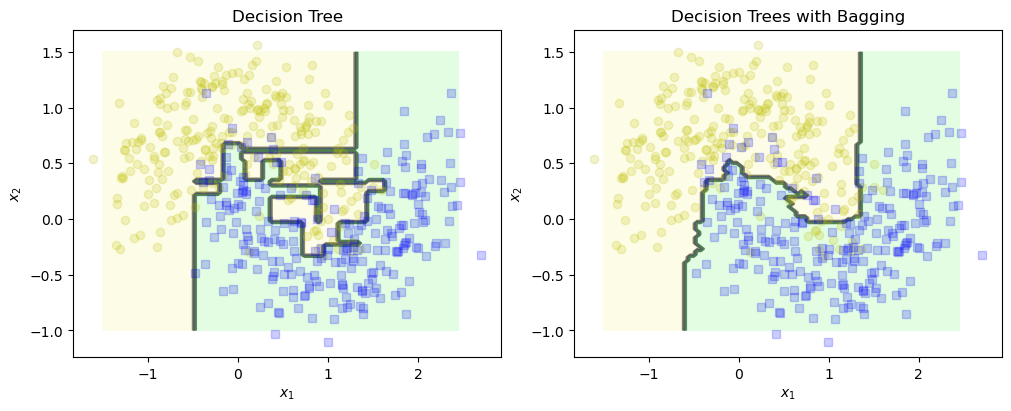

In [73]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500,
                            bootstrap=True,
                            oob_score=True)
bag_clf.fit(X_train, y_train)
plot_decision_boundary(tree_clf,X,y,ax=axes[0])
axes[0].set(title="Decision Tree")
plot_decision_boundary(bag_clf,X,y,ax=axes[1])
axes[1].set(title="Decision Trees with Bagging")

plt.show()

## RandomForests


In [74]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",
                                                   max_leaf_nodes=16),
                            n_estimators=500)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [76]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [77]:
rnd_clf = RandomForestClassifier()  # default n_estimators=100
rnd_clf.fit(X, y)

y_pred_rf = rnd_clf.predict(X_test)

In [79]:
rnd_clf = RandomForestClassifier()  # default n_estimators=100
rnd_clf.fit(X, y)


(125, 125)

In [80]:
from sklearn.datasets import load_iris
iris = load_iris()

In [81]:
def plot_digit(data, ax):
    image = data.reshape(28, 28)
    img = ax.imshow(image, cmap=mpl.cm.hot, interpolation='nearest')
    print(name, score)

sepal length (cm) 0.10608846358813358
sepal width (cm) 0.024908769965987856
petal length (cm) 0.4557450590375108
petal width (cm) 0.4132577074083678


In [82]:
rnd_clf.feature_importances_

array([0.10608846, 0.02490877, 0.45574506, 0.41325771])

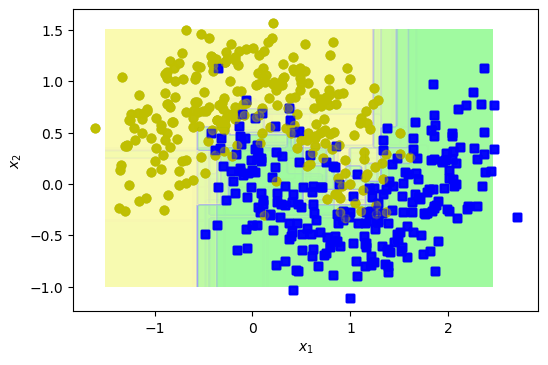

In [87]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(X_train), len(X_train))
    tree_clf.fit(X[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf,
                           X,
                           y,
                           ax,
                           lims=[-1.5, 2.45, -1, 1.5],
                           contour=False)

plt.show()

In [89]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,bootstrap=True,oob_score=True)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.8933333333333333

In [91]:
bag_clf.oob_decision_function_[:5]

array([[0.66091954, 0.33908046],
       [0.00502513, 0.99497487],
       [1.        , 0.        ],
       [0.01104972, 0.98895028],
       [0.99447514, 0.00552486]])

In [93]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.856

### Feature importance


In [94]:
# from sklearn.datasets import fetch_openml

In [101]:
# X,y = fetch_openml('mnist_784',version=1,as_frame=True,return_X_y=True,data_home='data')
# y = y.astype(np.int8)

## pyarrow dependence

In [100]:
# X.to_feather('../data/mnist_784_X.feather')
# y.to_frame().to_feather('../data/minist_784_y.feather')

In [103]:
X = pd.read_feather('../data/mnist_784_X.feather').to_numpy()
y = pd.read_feather('../data/mnist_784_y.feather').to_numpy()

In [106]:
rnd_clf = RandomForestClassifier() # default n_estimators=100
rnd_clf.fit(X,y)

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_2496/3436500407.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X,y)


RandomForestClassifier()

In [108]:
def plot_digit(data,ax):
    image = data.reshape(28,28)
    img = ax.imshow(image,cmap=mpl.cm.hot, interpolation='nearest')
    ax.axis("off")
    return img


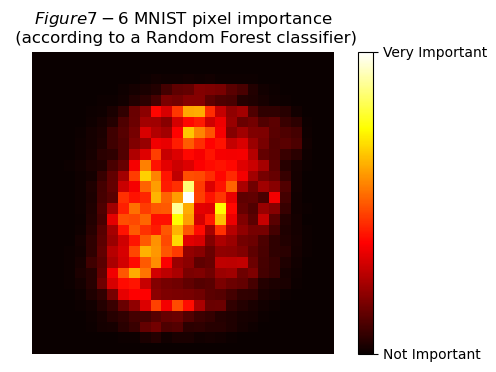

In [116]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

img = plot_digit(rnd_clf.feature_importances_, ax)

cbar = _.colorbar(
    img,
    ticks=[rnd_clf.feature_importances_.min(),
           rnd_clf.feature_importances_.max()],
    ax=ax)

cbar.ax.set_yticklabels(['Not Important', 'Very Important'])
ax.set(
    title=
    "$Figure 7-6.$ MNIST pixel importance \n (according to a Random Forest classifier)"
)

plt.show()

## Boosting AdaBoost

In [120]:
from sklearn.datasets import make_moons
# make moons dataset
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

In [121]:
X, y = make_moons(n_samples=500,noise=0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [125]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                           n_estimators=200,
                           algorithm="SAMME.R",
                           learning_rate=0.5,
                           random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

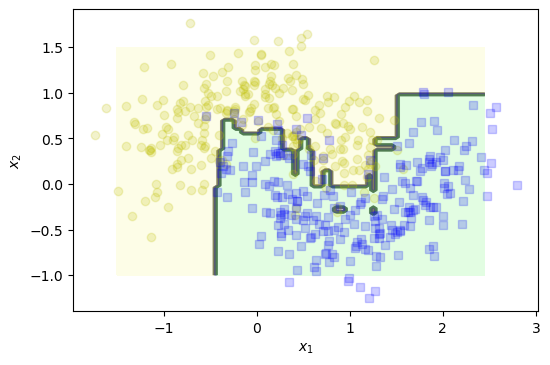

In [126]:
_, ax = plt.subplots(figsize=(6,4),dpi=100)
plot_decision_boundary(ada_clf,X,y,ax=ax)

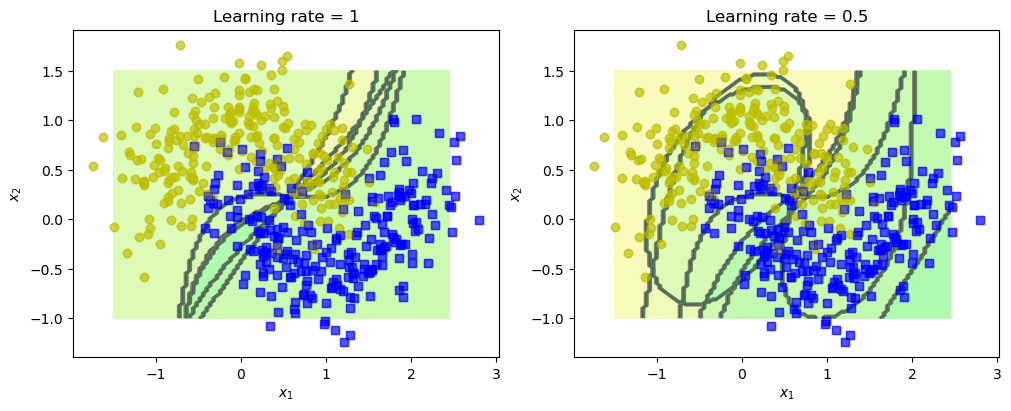

In [129]:
m = len(X_train)

_,axes = plt.subplots(1,2,figsize=(10,4),dpi=100,constrained_layout=True)

for learning_rate, ax in zip((1,0.5),axes.flatten()):
    sample_weights = np.ones(m) / m

    for i in range(5):
        svm_clf = SVC(kernel='rbf',C=0.2,gamma=0.6,random_state=42)
        svm_clf.fit(X_train,y_train,sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        r = sample_weights[y_pred != y_train] / sample_weights.sum() # eq. 7-1
        alpha = learning_rate * np.log((1-r) / r) # eq. 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha) #eq. 7-3
        sample_weights /= sample_weights.sum() # Nomalization Step

        plot_decision_boundary(svm_clf,X,y,ax)
        ax.set(title=f"Learning rate = {learning_rate}")
    # if learning_rate ==1:
    #     ax.text(-0.75, -0.95, "1", fontsize='medium')
    #     ax.text(-1.05, -0.95, "2", fontsize='medium')
    #     ax.text(1.0, -0.95, "3", fontsize='medium')
    #     ax.text(-1.45, -0.5, "4", fontsize='medium')
    #     ax.text(1.36, -0.95, "5", fontsize='medium')
    # else:
    #     ax.set(ylabel="")

plt.show()


